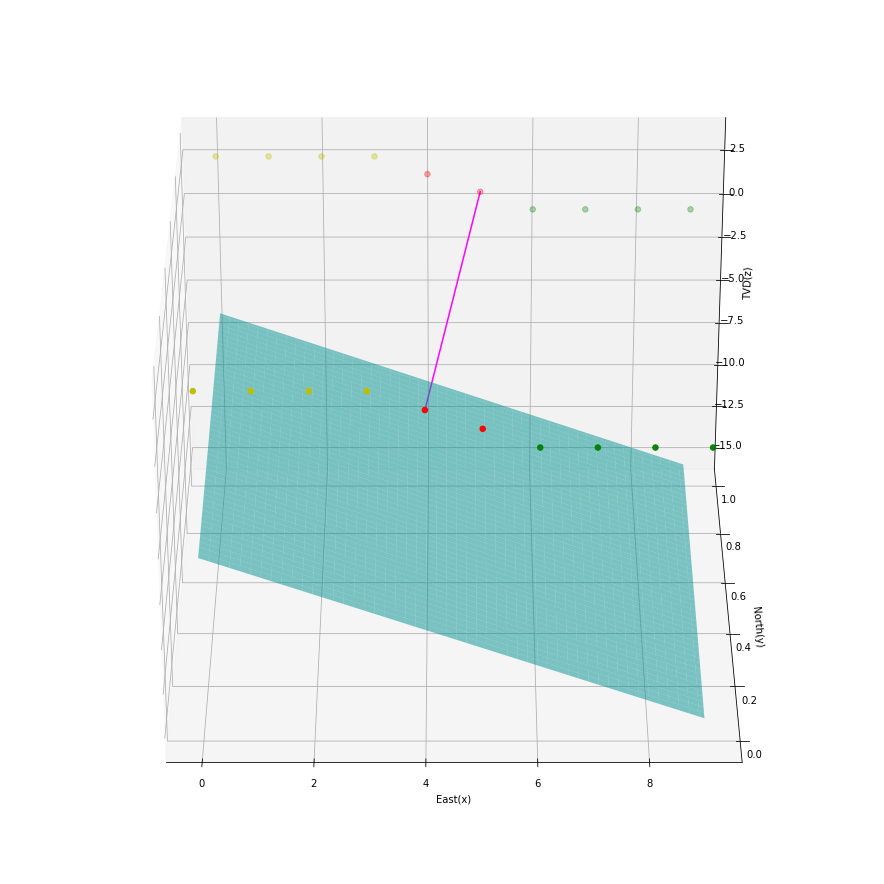

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class point3d:
    def __init__(self, x, y, z, color='r'):
        self.x = x
        self.y = y
        self.z = z
        self.color = color

class plane:
    def __init__(self, *args):
        if len(args) == 3:  # Plane defined using 3 points
            self.calculate_coefficients(*args)
        elif len(args) == 2:  # Plane defined using a line and a point
            self.calculate_coefficients_from_line(*args)
        elif len(args) == 4:  # Plane defined using coefficients A, B, C, and D
            self.A, self.B, self.C, self.D = args
        else:
            raise ValueError("Invalid number of arguments.")

    def calculate_coefficients(self, point1, point2, point3):
        x1, y1, z1 = point1.x, point1.y, point1.z
        x2, y2, z2 = point2.x, point2.y, point2.z
        x3, y3, z3 = point3.x, point3.y, point3.z

        A = (y2 - y1) * (z3 - z1) - (z2 - z1) * (y3 - y1)
        B = (z2 - z1) * (x3 - x1) - (x2 - x1) * (z3 - z1)
        C = (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)
        D = -A * x1 - B * y1 - C * z1

        self.A = A
        self.B = B
        self.C = C
        self.D = D

    def calculate_coefficients_from_line(self, line, point):
        A, B, C = line.A, line.B, line.C
        x, y, z = point.x, point.y, point.z

        D = -A * x - B * y - C * z

        self.A = A
        self.B = B
        self.C = C
        self.D = D

class line3d:
    def __init__(self, x1, y1, z1, x2, y2, z2):
        self.point1 = point3d(x1, y1, z1)
        self.point2 = point3d(x2, y2, z2)

    def direction_vector(self):
        """Calculate the direction vector of the line."""
        dx = self.point2.x - self.point1.x
        dy = self.point2.y - self.point1.y
        dz = self.point2.z - self.point1.z
        return (dx, dy, dz)

    def length(self):
        """Calculate the length of the line."""
        dv = self.direction_vector()
        return np.sqrt(dv[0]**2 + dv[1]**2 + dv[2]**2)

class visualization3d:
    def __init__(self):
        self.fig = plt.figure(figsize=(16, 16))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.set_xlabel('East(x)')
        self.ax.set_ylabel('North(y)')
        self.ax.set_zlabel('TVD(z)')

    def plot_points(self, points, point_size=30):
        x = [point.x for point in points]
        y = [point.y for point in points]
        z = [point.z for point in points]
        colors = [point.color for point in points]
        self.ax.scatter3D(x, y, z, c=colors, marker='o', s=point_size)

    def plot_plane(self, plane, points, point_size=30, color='gray'):
        x = [point.x for point in points]
        y = [point.y for point in points]
        z = [point.z for point in points]

        x_range = np.linspace(min(x), max(x), 100)
        y_range = np.linspace(min(y), max(y), 100)
        X, Y = np.meshgrid(x_range, y_range)
        if abs(plane.C) > 1e-6:  # Check if C is not close to zero
            Z = (plane.D - plane.A * X - plane.B * Y) / plane.C
        else:
            Z = np.zeros_like(X)  # Set Z to a default value if C is close to zero
        self.ax.plot_surface(X, Y, Z, alpha=0.5, color=color)

    def plot_line(self, point1, point2, color='blue'):
        x = [point1.x, point2.x]
        y = [point1.y, point2.y]
        z = [point1.z, point2.z]
        self.ax.plot3D(x, y, z, color=color)

    def show(self, elev=None, azim=None):
        if elev is not None:
            self.ax.view_init(elev=elev)
        if azim is not None:
            self.ax.view_init(azim=azim)
        plt.show()

# Create 3D points using point3d class
points = [
    point3d(0, 0, 3, color='y'),
    point3d(1, 0, 3, color='y'),
    point3d(2, 0, 3, color='y'),
    point3d(3, 0, 3, color='y'),
    point3d(4, 0, 2, color='r'),
    point3d(5, 0, 1, color='r'),
    point3d(6, 0, 0, color='g'),
    point3d(7, 0, 0, color='g'),
    point3d(8, 0, 0, color='g'),
    point3d(9, 0, 0, color='g'),
    
    point3d(0, 1, 3, color='y'),
    point3d(1, 1, 3, color='y'),
    point3d(2, 1, 3, color='y'),
    point3d(3, 1, 3, color='y'),
    point3d(4, 1, 2, color='r'),
    point3d(5, 1, 1, color='r'),
    point3d(6, 1, 0, color='g'),
    point3d(7, 1, 0, color='g'),
    point3d(8, 1, 0, color='g'),
    point3d(9, 1, 0, color='g'),
    
    #point3d(0, 3, 3, color='b'),
]

# Create plane using the first three red points
red_points = [points[4], points[5], points[15]]
p = plane(*red_points)

# Create line using two of the blue points
line_y = line3d(red_points[0].x, red_points[0].y, red_points[0].z, points[15].x, points[15].y, points[15].z)

# Example usage of the visualization3d class
vis = visualization3d()

# Plot points, planes, and lines
vis.plot_points(points)
vis.plot_plane(p, points, color='cyan')
vis.plot_line(line_y.point1, line_y.point2, color='magenta')

# Show the plot
#vis.show()
vis.show(elev=90, azim=-90)  
#vis.show(elev=90, azim=-45)  # near default
